In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

%matplotlib inline

In [206]:
# Sampling imports
from numpy import genfromtxt
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN


In [207]:
LABELS = ["Normal","Fraud"]

In [208]:
#reading dataset
card_data = pd.read_csv("../input/creditcard.csv")

In [209]:
card_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [210]:
#confirm there are no null values
card_data.isnull().values.any()

False

In [6]:
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [212]:
tmp = card_data.pivot("Time","Amount", "Class")
sns.heatmap(tmp)

ValueError: negative dimensions are not allowed

In [13]:
card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
card_data['Class'].nunique()

2

In [18]:
card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [181]:
k =492/(284315+492)
k*100

0.1727485630620034

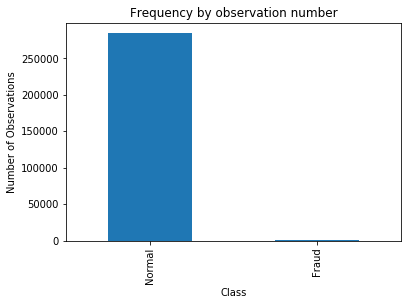

In [24]:
card_data['Class'].value_counts().plot.bar()
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [50]:
pca = PCA(n_components=2)
#card_data_2d = pd.DataFrame(pca.fit_transform(card_data[:,1:30]))
card_data_2d = pd.DataFrame(pca.fit_transform(card_data.drop(['Amount', 'Class','Time'], axis=1))) 


In [43]:
card_data_2d.head()

,0,1
0,1.359804,0.071922
1,-1.191879,-0.266217
2,1.358396,1.339097
3,0.966281,0.185360
4,1.158152,-0.876719


In [40]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [51]:
card_data_2d = pd.concat([card_data_2d, card_data['Class']], axis=1)
card_data_2d.columns

Index([0, 1, 'Class'], dtype='object')

In [52]:
card_data_2d.columns = ['x', 'y', 'class']


In [56]:
card_data_2d.head()

,x,y,class
0,1.359810,0.072754,0
1,-1.191876,-0.266725,0
2,1.358385,1.340649,0
3,0.966301,0.185519,0
4,1.158254,-0.877301,0


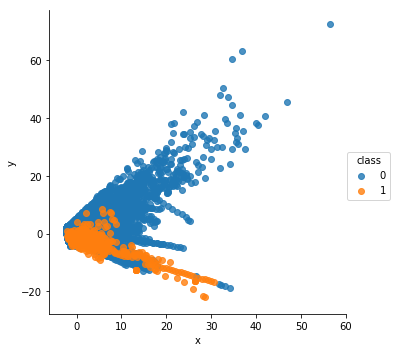

In [55]:
sns.lmplot(x="x",y="y", data=card_data_2d, fit_reg = False, hue="class")

In [61]:
card_data.drop(['Amount', 'Class','Time'], axis=1).head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [62]:
ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(card_data.drop(['Amount', 'Class','Time'], axis=1),card_data['Class'])

In [79]:
labeled_y_resampled =  pd.DataFrame(y_resampled)
labeled_y_resampled.columns=['class']


(568615, 1)

In [80]:
card_data_oversampled = pd.concat([pd.DataFrame(X_resampled), labeled_y_resampled], axis=1)
card_data_oversampled.shape

(568615, 29)

In [81]:
card_data_oversampled.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [82]:
card_data_oversampled['class'].value_counts()


0    284315
1    284300
Name: class, dtype: int64

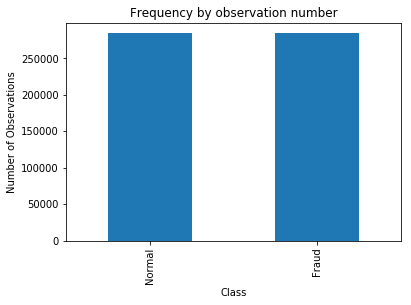

In [86]:
card_data_oversampled['class'].value_counts().plot.bar()
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations")

In [88]:
## to split data for training 
X = card_data_oversampled.iloc[:,0:28 ].values

In [90]:
#use one-hot encoding for classs labels
y = card_data_oversampled['class']
Y = keras.utils.to_categorical(y,num_classes=None)
Y

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]], dtype=float32)

In [91]:
#split into randomised training and testing subset
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.3, random_state= 0)

In [94]:
model = keras.Sequential()
model.add(keras.layers.Dense(28, input_shape=(28,), activation='relu' ))
model.add(keras.layers.Dense(2,  activation='softmax' ))
model.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
#model.summary()
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
398030/398030 [==============================] - 43s 107us/step - loss: 0.0568 - acc: 0.9870
Epoch 2/20
398030/398030 [==============================] - 46s 117us/step - loss: 0.0463 - acc: 0.9927
Epoch 3/20
398030/398030 [==============================] - 41s 104us/step - loss: 0.0370 - acc: 0.9945
Epoch 4/20
398030/398030 [==============================] - 41s 103us/step - loss: 0.0340 - acc: 0.9952
Epoch 5/20
398030/398030 [==============================] - 42s 106us/step - loss: 0.0293 - acc: 0.9956
Epoch 6/20
398030/398030 [==============================] - 46s 116us/step - loss: 0.0297 - acc: 0.9958
Epoch 7/20
398030/398030 [==============================] - 44s 110us/step - loss: 0.0326 - acc: 0.99600s - loss: 0.0324 - acc: 0.
Epoch 8/20
398030/398030 [==============================] - 43s 109us/step - loss: 0.0299 - acc: 0.9962
Epoch 9/20
398030/398030 [==============================] - 45s 113us/step - loss: 0.0386 - acc: 0.9959
Epoch 10/20
398030/398030 [==========

In [153]:
controlmodel = keras.Sequential()
controlmodel.add(keras.layers.Dense(28, input_shape=(28,), activation='relu' ))
controlmodel.add(keras.layers.Dense(2,  activation='softmax' ))
controlmodel.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
controlmodel.summary()
#model.fit()
control_history = controlmodel.fit(X_train,
                                    y_train,
                                    epochs=100,
                                    batch_size=512,
                                    validation_data=(X_test,y_test),
                                    verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_151 (Dense)            (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________


In [154]:
experimentmodel = keras.Sequential()
experimentmodel.add(keras.layers.Dense(19, input_shape=(28,), activation='relu' ))
experimentmodel.add(keras.layers.Dense(2,  activation='softmax' ))
experimentmodel.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
experimentmodel.summary()
#model.fit()
experiment_history = experimentmodel.fit(X_train,
                                    y_train,
                                    epochs=100,
                                    batch_size=512,
                                    validation_data=(X_test,y_test),
                                    verbose=0)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 19)                551       
_________________________________________________________________
dense_153 (Dense)            (None, 2)                 40        
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


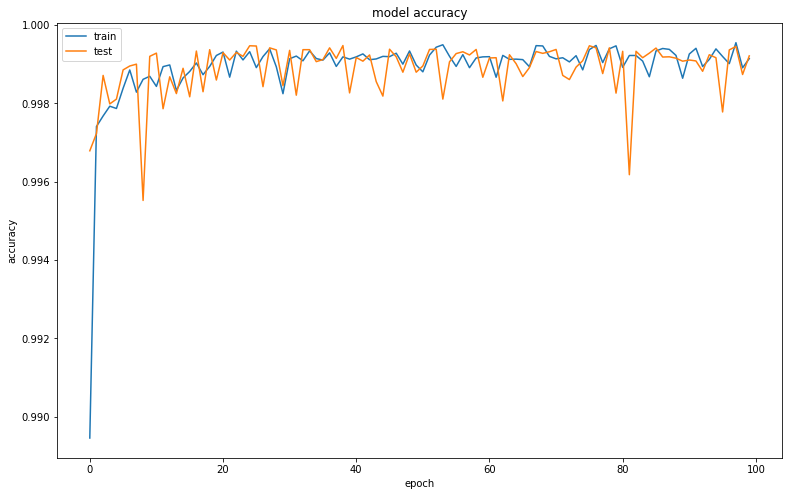

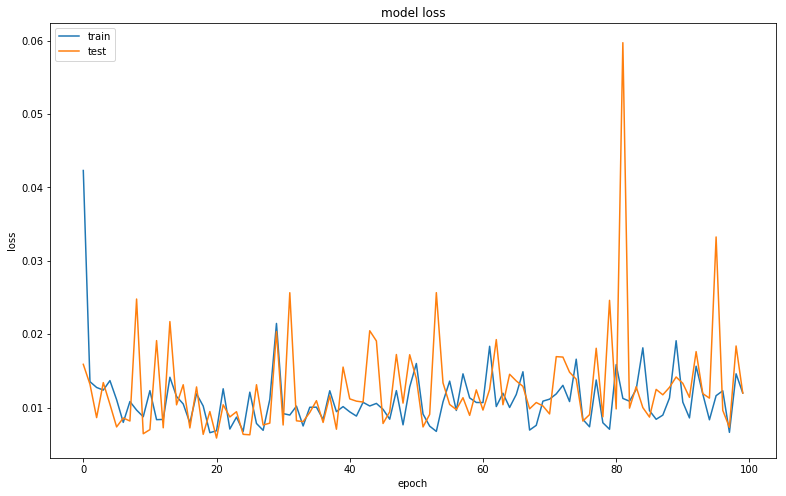

In [165]:
# summarize history for accuracy
plt.figure(figsize=(13,8))
plt.plot(control_history.history['acc'])
plt.plot(control_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.figure(figsize=(13,8))
plt.plot(control_history.history['loss'])
plt.plot(control_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

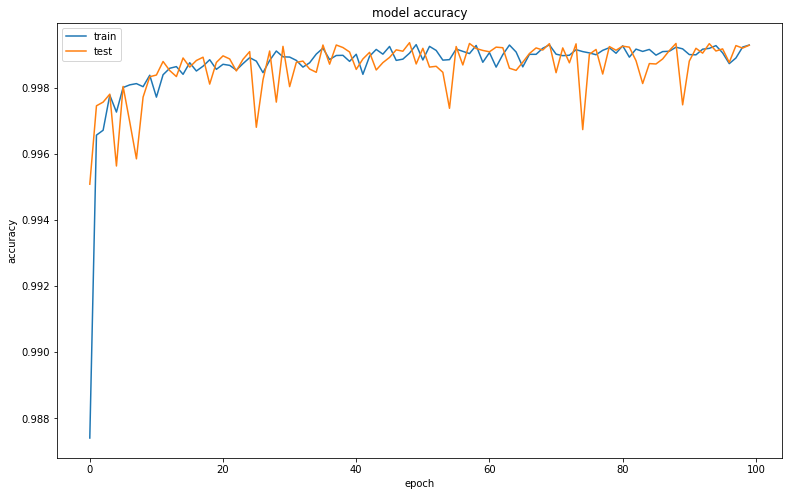

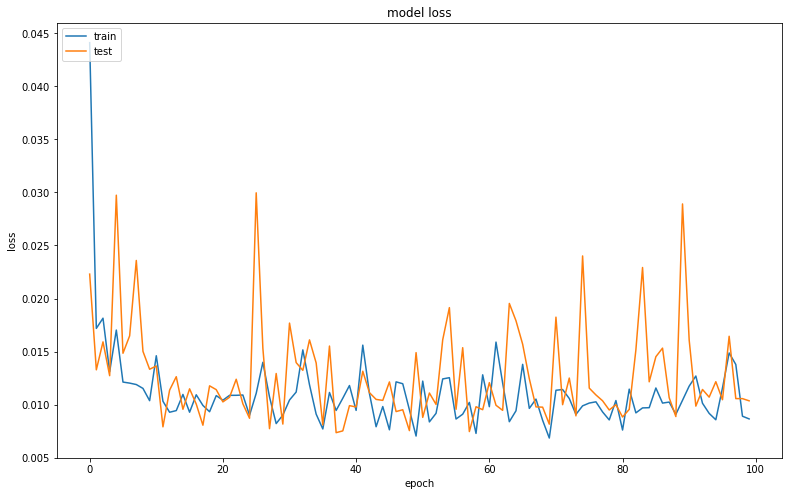

In [166]:
# summarize history for accuracy
plt.figure(figsize=(13,8))
plt.plot(experiment_history.history['acc'])
plt.plot(experiment_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.figure(figsize=(13,8))
plt.plot(experiment_history.history['loss'])
plt.plot(experiment_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [169]:
control2_history= None

In [180]:
controlmodel2 = keras.Sequential()
controlmodel2.add(keras.layers.Dense(28,  input_shape=(28,), activation='relu' ))
controlmodel2.add(keras.layers.Dense(2,  activation='softmax' ))
controlmodel2.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
controlmodel2.summary()
#model.fit()
control2_history = controlmodel.fit(X_train,
                                    y_train,
                                    epochs=40,
                                    batch_size=512,
                                    validation_data=(X_test,y_test),
                                    verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_164 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_165 (Dense)            (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
Train on 398030 samples, validate on 170585 samples
Epoch 1/40
398030/398030 [==============================] - 6s 15us/step - loss: 0.0104 - acc: 0.9993 - val_loss: 0.0090 - val_acc: 0.9994
Epoch 2/40
398030/398030 [==============================] - 3s 7us/step - loss: 0.0165 - acc: 0.9990 - val_loss: 0.0233 - val_acc: 0.9985
Epoch 3/40
398030/398030 [==============================] - 3s 7us/step - loss: 0.0142 - acc: 0.9991 - val_loss: 0.0141 - val_acc: 0.9988
Epoch 4/40
398030/398030 [==============================] - 3s 7us/step -

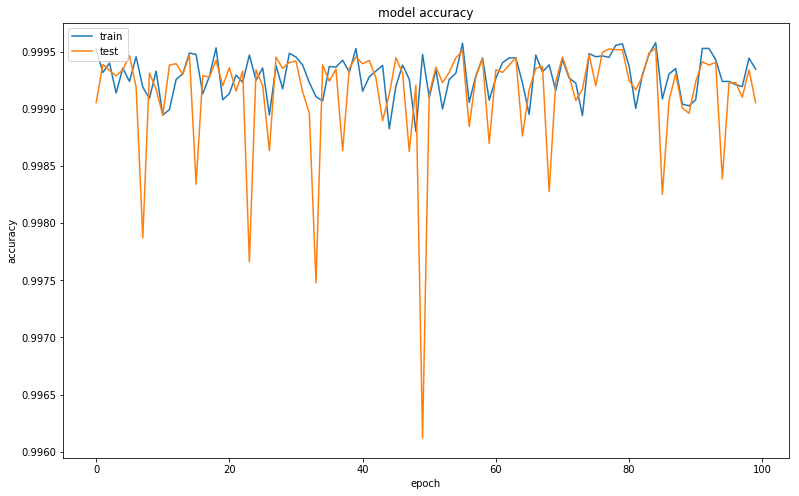

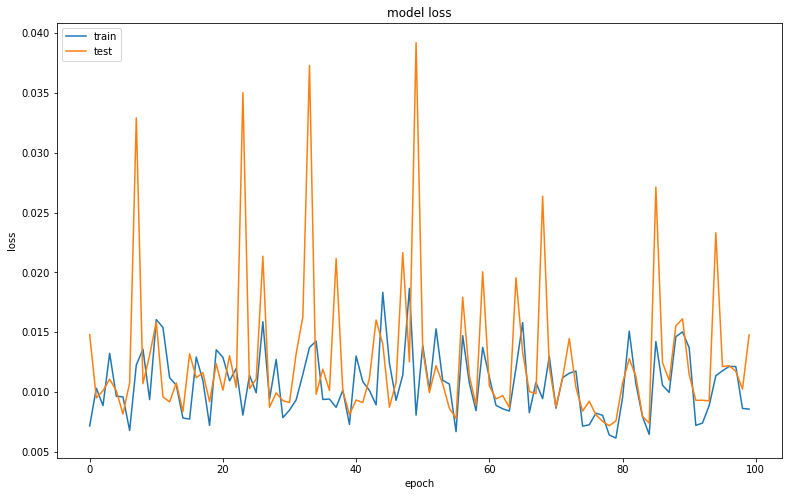

In [176]:
# summarize history for accuracy
plt.figure(figsize=(13,8))
plt.plot(control2_history.history['acc'])
plt.plot(control2_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss

plt.figure(figsize=(13,8))
plt.plot(control2_history.history['loss'])
plt.plot(control2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [179]:
test_loss, test_acc = controlmodel.evaluate(X_test,y_test)
test_acc

170585/170585 [==============================] - 5s 30us/step


0.99905618899668791

In [96]:
test_loss, test_acc = model.evaluate(X_test,y_test)


170585/170585 [==============================] - 7s 40us/step


In [97]:
test_loss
test_acc

0.99803030747134858

In [182]:
control2_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [103]:
results_control_evaluation_accuracy = []


In [106]:
for _ in range(0,30):
    model = keras.Sequential()
    model.add(keras.layers.Dense(28, input_shape=(28,), activation='relu' ))
    model.add(keras.layers.Dense(2,  activation='softmax' ))
    model.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    model.fit(X_train, y_train, epochs=20)
    print("iteration-{} complete!!!".format(_))
    test_loss, test_acc = model.evaluate(X_test,y_test)
    results_control_evaluation_accuracy.append(test_acc)
    

Epoch 1/20
398030/398030 [==============================] - 13s 34us/step - loss: 0.0620 - acc: 0.9872 4s - loss: 0.0725 - acc: 0.98 - ETA: 4s - loss: 0.07 - ETA: 3s - loss: 0.0 - ETA: 2s - loss: 0.0686  - ETA: 2s - loss: 0.0666 - acc: 0.98 - ETA: 2s - loss: 0.0664 - acc: 0 - ETA: 1s - loss: 0.0655 - acc: 0 - ETA: 1s - loss: 0.0646 - acc:  - ETA: 1s - loss
Epoch 2/20
398030/398030 [==============================] - 13s 33us/step - loss: 0.0416 - acc: 0.9933 10s - loss: 0.0 - ETA:  - ETA: 0s - loss: 0.0418 - acc: 0.99 - ETA: 0s - loss: 0.0416 - acc: 
Epoch 3/20
398030/398030 [==============================] - 13s 32us/step - loss: 0.0376 - acc: 0.9945 10s - loss: 0.0465 - - ETA: 10s - loss: 0.0 - ETA: 9s - loss: - ETA: 2s -  - ETA: 1s - ETA: 0s - loss: 0.0376 - acc: 0.99
Epoch 4/20
398030/398030 [==============================] - 13s 32us/step - loss: 0.0314 - acc: 0.9954 7s - loss: 0.031 - ETA:  - ETA: 3s - loss: 0.03
Epoch 5/20
398030/398030 [==============================] - 12s 30us

398030/398030 [==============================] - 13s 32us/step - loss: 0.0362 - acc: 0.9962
Epoch 11/20
398030/398030 [==============================] - 14s 35us/step - loss: 0.0365 - acc: 0.9962 0s - loss: 0.0365 - acc:  - ETA: 0s - loss: 0.0366 - acc: 0.
Epoch 12/20
398030/398030 [==============================] - 13s 32us/step - loss: 0.0304 - acc: 0.9966 0s - loss: 0.0
Epoch 13/20
398030/398030 [==============================] - 13s 33us/step - loss: 0.0361 - acc: 0.9963
Epoch 14/20
398030/398030 [==============================] - 13s 33us/step - loss: 0.0290 - acc: 0.9969 ETA: 6s - loss: 0.0317  - ETA: 6s - loss: - ETA: 4s - loss: 0.0292 -  - ETA: 4s - loss - ETA: 3s - loss: 0.0285  - ETA: 2s -  - ETA: 1s - loss: 0.0286 - acc: 0.9 - ETA: 1s 
Epoch 15/20
398030/398030 [==============================] - 13s 32us/step - loss: 0.0376 - acc: 0.9962A: 5s - loss: 0.04 - ETA: 4s - loss: 0.0443 - acc: - ETA: 4s - loss - ETA: 3s - loss: 0.0401 - acc: 0 - ETA: 3s - loss: 0.0397 - a - ETA: 2s

398030/398030 [==============================] - 13s 34us/step - loss: 0.0247 - acc: 0.9965 2s - loss: 0.02 - ETA: 1s - lo - ETA: 0s - loss: 0.0244 - acc: 0.
Epoch 8/20
398030/398030 [==============================] - 13s 33us/step - loss: 0.0226 - acc: 0.9970 1s - loss: 0 - ETA: 0s - loss: 0.02
Epoch 9/20
398030/398030 [==============================] - 14s 36us/step - loss: 0.0191 - acc: 0.9973
Epoch 10/20
398030/398030 [==============================] - 13s 34us/step - loss: 0.0219 - acc: 0.9971 10s - l - 
Epoch 11/20
398030/398030 [==============================] - 14s 34us/step - loss: 0.0207 - acc: 0.9973 3s - loss: 0.0201 - acc - ETA: 3s - ETA: 
Epoch 12/20
398030/398030 [==============================] - 13s 33us/step - loss: 0.0234 - acc: 0.9972 11s - loss: 0.0236 - acc -  - ETA: 8s - los - ETA: 7s - loss: 0.0270  - ETA: 6s - loss: 0.02 - ETA - ETA: 2s - ETA: 0s - loss: 0.02
Epoch 13/20
398030/398030 [==============================] - 13s 33us/step - loss: 0.0182 - acc: 0.9976

398030/398030 [==============================] - 14s 34us/step - loss: 0.0508 - acc: 0.9922
Epoch 3/20
398030/398030 [==============================] - 14s 35us/step - loss: 0.0486 - acc: 0.9933 1s - loss: 0.0464 - acc - ETA: 1s - 
Epoch 4/20
398030/398030 [==============================] - 14s 35us/step - loss: 0.0429 - acc: 0.9943 10s - loss: 0.0402 - acc: 0. - ETA: 9s - ETA: 8s - loss: 0.0402 - 
Epoch 5/20
398030/398030 [==============================] - 14s 35us/step - loss: 0.0407 - acc: 0.9944 11s - loss: 0. - - ETA: 10s - loss: 0.04 - E -
Epoch 6/20
398030/398030 [==============================] - 14s 35us/step - loss: 0.0345 - acc: 0.9952- ETA: 0s - loss: 0.0345 - acc: 0.9
Epoch 7/20
398030/398030 [==============================] - 14s 35us/step - loss: 0.0422 - acc: 0.9948 10s - l - ETA: 7s - loss: 0.0552 - ETA: 7s - loss: 0.0528 - - ETA: 4s - loss: 0.0473 - acc: - ETA: 4s - loss: 0.0466 - acc: 0.994 - ETA: 4s - loss: 0. - ETA: 3s - loss: - ETA: 2s - loss: 0.0449 - ac
Epoch 8/

398030/398030 [==============================] - 42s 107us/step - loss: 0.0524 - acc: 0.9952
Epoch 11/20
398030/398030 [==============================] - 42s 106us/step - loss: 0.0396 - acc: 0.9958
Epoch 12/20
398030/398030 [==============================] - 43s 107us/step - loss: 0.0262 - acc: 0.9969
Epoch 13/20
398030/398030 [==============================] - 45s 112us/step - loss: 0.0324 - acc: 0.9967
Epoch 14/20
398030/398030 [==============================] - 43s 109us/step - loss: 0.0265 - acc: 0.9971
Epoch 15/20
398030/398030 [==============================] - 51s 127us/step - loss: 0.0383 - acc: 0.9965
Epoch 16/20
398030/398030 [==============================] - 46s 116us/step - loss: 0.0313 - acc: 0.9969
Epoch 17/20
398030/398030 [==============================] - 49s 123us/step - loss: 0.0287 - acc: 0.9971
Epoch 18/20
398030/398030 [==============================] - 51s 129us/step - loss: 0.0250 - acc: 0.9974
Epoch 19/20
398030/398030 [==============================] - 52s 13

398030/398030 [==============================] - 15s 38us/step - loss: 0.0237 - acc: 0.9971 1
Epoch 12/20
398030/398030 [==============================] - 15s 38us/step - loss: 0.0259 - acc: 0.9970
Epoch 13/20
398030/398030 [==============================] - 16s 39us/step - loss: 0.0192 - acc: 0.9975
Epoch 14/20
398030/398030 [==============================] - 15s 38us/step - loss: 0.0206 - acc: 0.9974 0s - loss: 0.0206 - acc: 0.
Epoch 15/20
398030/398030 [==============================] - 15s 38us/step - loss: 0.0233 - acc: 0.9972
Epoch 16/20
398030/398030 [==============================] - 15s 39us/step - loss: 0.0226 - acc: 0.9972 5 - ETA: 4s - loss: 0.0237 - E
Epoch 17/20
398030/398030 [==============================] - 16s 39us/step - loss: 0.0232 - acc: 0.9974 4s - loss: 0.0226 - acc: 0.997  - ETA: 0s - loss: 0.0233 - acc: 0
Epoch 18/20
398030/398030 [==============================] - 15s 39us/step - loss: 0.0252 - acc: 0.9972 3s - loss: 0. - ETA: 2s - - ETA: 1s - l
Epoch 19/20
3

In [114]:
results_control_evaluation_accuracy

[0.99827065685728522,
 0.99757305742005453,
 0.99757891960019929,
 0.99864583638655213,
 0.99801858311105895,
 0.99634786176979218,
 0.99557991617082398,
 0.99827065685728522,
 0.99820031069554771,
 0.99845238444177387,
 0.99678752528065184,
 0.99831169211829884,
 0.99849341970278749,
 0.99765512794208167,
 0.99748512471788253,
 0.99791892604859744,
 0.99787789078758393,
 0.9979540991294662,
 0.99736201893484189,
 0.99753788433918578,
 0.99771961192367442,
 0.99846997098220824,
 0.99826479467714047,
 0.99805375619192782,
 0.99816513761467895,
 0.99784857988685993,
 0.99683442272181022,
 0.99844066008148435,
 0.99791892604859744,
 0.99753202215904091]

In [109]:
results_experiment1_evaluation_accuracy = []


In [111]:
for _ in range(0,30):
    model = keras.Sequential()
    model.add(keras.layers.Dense(19, input_shape=(28,), activation='relu' ))
    model.add(keras.layers.Dense(2,  activation='softmax' ))
    model.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
    #model.summary()
    model.fit(X_train, y_train, epochs=20)
    print("iteration-{} complete!!!".format(_))
    test_loss, test_acc = model.evaluate(X_test,y_test)
    results_experiment1_evaluation_accuracy.append(test_acc)

Epoch 1/20
398030/398030 [==============================] - 18s 46us/step - loss: 0.0586 - acc: 0.9865 3s - loss: 0.0619 - acc: 0.98 - ETA:  - ETA: 1
Epoch 2/20
398030/398030 [==============================] - 16s 41us/step - loss: 0.0383 - acc: 0.9931
Epoch 3/20
398030/398030 [==============================] - 18s 44us/step - loss: 0.0336 - acc: 0.9942
Epoch 4/20
398030/398030 [==============================] - 17s 44us/step - loss: 0.0317 - acc: 0.9950 0s - loss: 0.0
Epoch 5/20
398030/398030 [==============================] - 17s 42us/step - loss: 0.0365 - acc: 0.9948
Epoch 6/20
398030/398030 [==============================] - 17s 42us/step - loss: 0.0312 - acc: 0.9953
Epoch 7/20
398030/398030 [==============================] - 17s 43us/step - loss: 0.0273 - acc: 0.9958 4s - loss: 0 - ETA: 1s - loss: 0.0280 - acc: 0 - ETA: 0s - loss: 0.
Epoch 8/20
398030/398030 [==============================] - 18s 45us/step - loss: 0.0287 - acc: 0.9959
Epoch 9/20
398030/398030 [====================

170585/170585 [==============================] - 4s 25us/step
Epoch 1/20
398030/398030 [==============================] - 20s 49us/step - loss: 0.0526 - acc: 0.9871
Epoch 2/20
398030/398030 [==============================] - 17s 42us/step - loss: 0.0356 - acc: 0.9932 0s - loss: 0.03
Epoch 3/20
398030/398030 [==============================] - 16s 40us/step - loss: 0.0298 - acc: 0.9946
Epoch 4/20
398030/398030 [==============================] - 16s 41us/step - loss: 0.0279 - acc: 0.9953
Epoch 5/20
398030/398030 [==============================] - 18s 45us/step - loss: 0.0275 - acc: 0.9956 
Epoch 6/20
398030/398030 [==============================] - 18s 46us/step - loss: 0.0303 - acc: 0.9959
Epoch 7/20
398030/398030 [==============================] - 18s 46us/step - loss: 0.0301 - acc: 0.9959
Epoch 8/20
398030/398030 [==============================] - 18s 44us/step - loss: 0.0259 - acc: 0.9964
Epoch 9/20
398030/398030 [==============================] - 17s 42us/step - loss: 0.0290 - acc: 0

398030/398030 [==============================] - 51s 129us/step - loss: 0.0403 - acc: 0.9947
Epoch 6/20
398030/398030 [==============================] - 52s 131us/step - loss: 0.0329 - acc: 0.9954
Epoch 7/20
398030/398030 [==============================] - 52s 130us/step - loss: 0.0319 - acc: 0.9957
Epoch 8/20
398030/398030 [==============================] - 55s 139us/step - loss: 0.0279 - acc: 0.9960
Epoch 9/20
398030/398030 [==============================] - 52s 131us/step - loss: 0.0372 - acc: 0.9955
Epoch 10/20
398030/398030 [==============================] - 52s 131us/step - loss: 0.0295 - acc: 0.9959
Epoch 11/20
398030/398030 [==============================] - 53s 134us/step - loss: 0.0244 - acc: 0.9964
Epoch 12/20
398030/398030 [==============================] - 53s 132us/step - loss: 0.0236 - acc: 0.9968
Epoch 13/20
398030/398030 [==============================] - 53s 134us/step - loss: 0.0263 - acc: 0.9966
Epoch 14/20
398030/398030 [==============================] - 53s 134us/

398030/398030 [==============================] - 54s 136us/step - loss: 0.0289 - acc: 0.9965
Epoch 15/20
398030/398030 [==============================] - 55s 137us/step - loss: 0.0279 - acc: 0.9966
Epoch 16/20
398030/398030 [==============================] - 54s 136us/step - loss: 0.0251 - acc: 0.9968
Epoch 17/20
398030/398030 [==============================] - 54s 136us/step - loss: 0.0210 - acc: 0.9973
Epoch 18/20
398030/398030 [==============================] - 55s 138us/step - loss: 0.0283 - acc: 0.9966
Epoch 19/20
398030/398030 [==============================] - 54s 136us/step - loss: 0.0245 - acc: 0.9969
Epoch 20/20
398030/398030 [==============================] - 54s 137us/step - loss: 0.0240 - acc: 0.9971
iteration-21 complete!!!
170585/170585 [==============================] - 15s 88us/step
Epoch 1/20
398030/398030 [==============================] - 61s 154us/step - loss: 0.0545 - acc: 0.9868
Epoch 2/20
398030/398030 [==============================] - 55s 138us/step - loss: 0.

398030/398030 [==============================] - 76s 190us/step - loss: 0.0421 - acc: 0.9927
Epoch 3/20
398030/398030 [==============================] - 63s 159us/step - loss: 0.0398 - acc: 0.9939
Epoch 4/20
398030/398030 [==============================] - 49s 123us/step - loss: 0.0543 - acc: 0.9934
Epoch 5/20
398030/398030 [==============================] - 50s 126us/step - loss: 0.0428 - acc: 0.9941
Epoch 6/20
398030/398030 [==============================] - 50s 126us/step - loss: 0.0329 - acc: 0.9954
Epoch 7/20
398030/398030 [==============================] - 59s 148us/step - loss: 0.0286 - acc: 0.9961
Epoch 8/20
398030/398030 [==============================] - 57s 144us/step - loss: 0.0250 - acc: 0.9964
Epoch 9/20
398030/398030 [==============================] - 54s 136us/step - loss: 0.0221 - acc: 0.9968
Epoch 10/20
398030/398030 [==============================] - 52s 131us/step - loss: 0.0222 - acc: 0.9969
Epoch 11/20
398030/398030 [==============================] - 53s 132us/ste

In [113]:
results_experiment1_evaluation_accuracy

[0.9963009643286338,
 0.99799513439047982,
 0.99593164697951164,
 0.99801858311105895,
 0.99593164697951164,
 0.99793065040888707,
 0.99753788433918578,
 0.99740891637600027,
 0.99769616320309518,
 0.99753202215904091,
 0.99730925931353875,
 0.99681683618137584,
 0.9934578069584078,
 0.99777823372512242,
 0.99829996775800922,
 0.99764340358179204,
 0.99712166954890524,
 0.99814168889409971,
 0.99645338101239855,
 0.99788375296772869,
 0.99780754462584631,
 0.99771374974352967,
 0.9983761760998916,
 0.99792478822874231,
 0.99833514083887798,
 0.99776064718468793,
 0.99791306386845269,
 0.99786030424714955,
 0.99769616320309518,
 0.9980713427323622,
 0.99701615030315416,
 0.99774892282439842,
 0.99807720491250695,
 0.99795996130961107,
 0.9977665093648328,
 0.99848755752264262]

In [115]:
#saving results
pd.DataFrame(results_control_evaluation_accuracy).to_csv('results_control_evaluation_accuracy.csv', index=False)
pd.DataFrame(results_experiment1_evaluation_accuracy).to_csv('results_experiment1_evaluation_accuracy.csv', index=False)

In [134]:
control =  pd.DataFrame(results_control_evaluation_accuracy)
experiment1 = pd.DataFrame(results_experiment1_evaluation_accuracy[6:])

In [135]:
##Basic Stats
mean_control_accuracy = control.mean()
print("Mean Control Accuracy: {}".format(mean_control_accuracy))

mean_experimental_accuracy = experiment1.mean()
print("Mean Experimental Accuracy: {}".format(mean_experimental_accuracy))

Mean Control Accuracy: 0    0.997786
dtype: float64
Mean Experimental Accuracy: 0    0.997587
dtype: float64


In [136]:
std_control_accuracy = control.std()
print("Standard Deviation of Control Accuracy Results: {}".format(std_control_accuracy))

std_experimental_accuracy = experiment1.std()
print("Standard Deviation of Experimental Accuracy Results: {}".format(std_experimental_accuracy))

Standard Deviation of Control Accuracy Results: 0    0.00068
dtype: float64
Standard Deviation of Experimental Accuracy Results: 0    0.000902
dtype: float64


In [203]:
results_accuracy= pd.concat([control, experiment1], axis=1)
results_accuracy.columns = ['Control', 'Experimental']
results_accuracy

,Control,Experimental
0,0.998271,0.997538
1,0.997573,0.997409
2,0.997579,0.997696
3,0.998646,0.997532
4,0.998019,0.997309
5,0.996348,0.996817
6,0.995580,0.993458
7,0.998271,0.997778
8,0.998200,0.998300
9,0.998452,0.997643


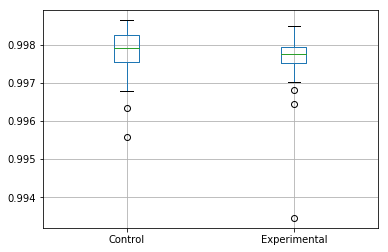

In [138]:
results_accuracy.boxplot()

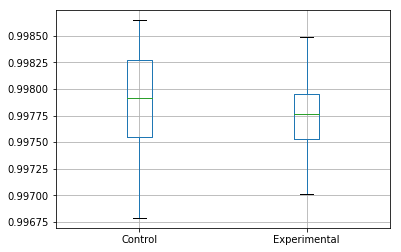

In [139]:
results_accuracy.boxplot(showfliers=False)

In [140]:
s, p = stats.wilcoxon(control[0], experiment1[0])

if p < 0.05:
  print('null hypothesis rejected, significant difference between the data-sets')
else:
  print('null hypothesis accepted, no significant difference between the data-sets')

null hypothesis accepted, no significant difference between the data-sets


In [185]:
ans= []

In [186]:
for _ in range(0,3):
    for x in range(0,10):
        ans.append(x)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [196]:
from sklearn.model_selection import StratifiedKFold
k_history =None
k_accuracy =[]

In [197]:
for _ in range(0,2):
    seed = _
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)
    k = kfold.split(X, Y)
    for train, test in kfold.split(X, y):
        model = keras.Sequential()
        model.add(keras.layers.Dense(28, input_shape=(28,), activation='relu' ))
        model.add(keras.layers.Dense(2,  activation='softmax' ))
        model.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
        model.summary()
        #baseline_history = model.fit(X[train], keras.utils.to_categorical(y[train],num_classes=None) , epochs=40)
        #print("iteration-{} complete!!!".format(_))
        test_loss, test_acc = model.evaluate(X[test], keras.utils.to_categorical(y[test],num_classes=None))
        results_control_evaluation_accuracy.append(test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_167 (Dense)            (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
189539/189539 [==============================] - 89s 470us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_169 (Dense)            (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
189539/189539 [=

In [199]:
results_control_evaluation_accuracy

[0.99827065685728522,
 0.99757305742005453,
 0.99757891960019929,
 0.99864583638655213,
 0.99801858311105895,
 0.99634786176979218,
 0.99557991617082398,
 0.99827065685728522,
 0.99820031069554771,
 0.99845238444177387,
 0.99678752528065184,
 0.99831169211829884,
 0.99849341970278749,
 0.99765512794208167,
 0.99748512471788253,
 0.99791892604859744,
 0.99787789078758393,
 0.9979540991294662,
 0.99736201893484189,
 0.99753788433918578,
 0.99771961192367442,
 0.99846997098220824,
 0.99826479467714047,
 0.99805375619192782,
 0.99816513761467895,
 0.99784857988685993,
 0.99683442272181022,
 0.99844066008148435,
 0.99791892604859744,
 0.99753202215904091,
 0.59723328708091639,
 0.52820791499374797,
 0.5760247339569583,
 0.54703781279842145,
 0.54928537134837685,
 0.619256398486839]

In [200]:
k_baseline_history =None
k_results_control_evaluation_accuracy =[]

In [201]:
from sklearn.model_selection import StratifiedKFold

In [202]:
for _ in range(0,3):
    seed = _
    np.random.seed(seed)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
    for train, test in kfold.split(X, y):
        model = keras.Sequential()
        model.add(keras.layers.Dense(28, input_shape=(28,), activation='relu' ))
        model.add(keras.layers.Dense(2,  activation='softmax' ))
        model.compile(keras.optimizers.Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
        model.summary()
        k_baseline_history = model.fit(X[train], keras.utils.to_categorical(y[train],num_classes=None) , epochs=40, verbose=0)
        #print("iteration-{} complete!!!".format(_))
        test_loss, test_acc = model.evaluate(X[test], keras.utils.to_categorical(y[test],num_classes=None))
        k_results_control_evaluation_accuracy.append(test_acc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_179 (Dense)            (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
56862/56862 [==============================] - 11s 195us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_181 (Dense)            (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
56862/56862 [=====

56862/56862 [==============================] - 6s 100us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_205 (Dense)            (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
_________________________________________________________________
56862/56862 [==============================] - 8s 136us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 28)                812       
_________________________________________________________________
dense_207 (Dense)            (None, 2)                 58        
Total params: 870
Trainable params: 870
Non-trainable params: 0
________________________

KeyboardInterrupt: 